In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

from tqdm import tqdm_notebook
import os
import glob
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate
from scipy import spatial, signal
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
import importlib
from IPython.display import display, HTML
import pandas as pd
import pickle
import re
from scanf import scanf

import matplotlib
# matplotlib.use('agg')
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

from tqdm import tqdm, tqdm_notebook
from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf
from codeStore import support_fun_table as spf_tb

# %matplotlib notebook
%matplotlib inline
rc('animation', html='html5')
fontsize = 40
PWD = os.getcwd()

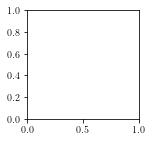

In [2]:
fig = plt.figure(figsize=(2, 2))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1)

In [6]:
job_dir = 'ecoC01B01_psi-0a'
table_name = 'ecoC01B01_tau1c'

In [9]:
# show phase map of theta-phi, load date
importlib.reload(spf_tb)

t_headle = '(.*?).pickle'
t_path = os.listdir(os.path.join(PWD, job_dir))
filename_list = [filename for filename in os.listdir(os.path.join(PWD, job_dir)) 
                 if re.match(t_headle, filename) is not None]

for tname in tqdm_notebook(filename_list[:]):
    tpath = os.path.join(PWD, job_dir, tname)
    with open(tpath, 'rb') as handle:
        tpick = pickle.load(handle)
    Table_t = tpick['Table_t']
    Table_dt = tpick['Table_dt']
    Table_X = tpick['Table_X']
    Table_P = tpick['Table_P']
    Table_P2 = tpick['Table_P2']
    Table_theta = tpick['Table_theta']
    Table_phi = tpick['Table_phi']
    Table_psi = tpick['Table_psi']
    Table_eta = tpick['Table_eta']
    
    save_name = '%s.jpg' % (os.path.splitext(os.path.basename(tname))[0])
    idx = Table_t > 0
    fig = spf_tb.save_table_result(os.path.join(PWD, job_dir, save_name), 
                                Table_t[idx], Table_dt[idx], Table_X[idx], Table_P[idx], Table_P2[idx], 
                                Table_theta[idx], Table_phi[idx], Table_psi[idx], Table_eta[idx])
    plt.close(fig)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


In [5]:
filename_list

['th1.229_ph1.069_ps0.000_D20191209_T235530.pickle',
 'th3.142_ph3.743_ps0.000_D20191210_T003130.pickle',
 'th2.595_ph5.748_ps0.000_D20191210_T010029.pickle',
 'th1.503_ph1.337_ps0.000_D20191209_T235616.pickle',
 'th1.093_ph5.481_ps0.000_D20191210_T005831.pickle',
 'th1.639_ph1.069_ps0.000_D20191209_T235530.pickle',
 'th0.546_ph2.139_ps0.000_D20191210_T000740.pickle',
 'th0.410_ph4.813_ps0.000_D20191210_T004201.pickle',
 'th1.912_ph0.668_ps0.000_D20191209_T235029.pickle',
 'th1.639_ph0.668_ps0.000_D20191209_T235029.pickle',
 'th2.595_ph3.342_ps0.000_D20191210_T002700.pickle',
 'th1.912_ph6.150_ps0.000_D20191210_T010413.pickle',
 'th2.868_ph5.080_ps0.000_D20191210_T004512.pickle',
 'th2.595_ph3.075_ps0.000_D20191210_T002442.pickle',
 'th0.273_ph4.946_ps0.000_D20191210_T004218.pickle',
 'th2.595_ph1.203_ps0.000_D20191209_T235535.pickle',
 'th2.185_ph4.946_ps0.000_D20191210_T004219.pickle',
 'th1.366_ph0.134_ps0.000_D20191209_T232306.pickle',
 'th1.912_ph5.748_ps0.000_D20191210_T010030.pi